# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dat = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")

dat.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
from pandas import get_dummies

df = get_dummies(dat)
df = df.dropna()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [14]:

y = df['bill_depth_mm']
X = df[['bill_length_mm', 'species_Chinstrap', 'species_Gentoo', 'sex_female']]

lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr_fit = lr.fit(X_train, y_train)

y_pred_lrfit_train = lr_fit.predict(X_train)
mse_train_lrfit = mean_squared_error(y_train, y_pred_lrfit_train)

y_pred_lrfit_test = lr_fit.predict(X_test)
mse_test_lrfit = mean_squared_error(y_test, y_pred_lrfit_test)

print(mse_train_lrfit)
print(mse_test_lrfit)



0.6541565696946758
0.7636010805318829


In [15]:
# Model 2
y2 = df['bill_depth_mm']
X2 = df[['bill_length_mm', 'species_Chinstrap', 'species_Gentoo', 'sex_female', 'island_Biscoe', 'island_Dream']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

lr_fit2 = lr.fit(X_train2, y_train2)

y_pred_lrfit2_train = lr_fit.predict(X_train2)
mse_train_lrfit2 = mean_squared_error(y_train2, y_pred_lrfit2_train)

y_pred_lrfit2_test = lr_fit.predict(X_test2)
mse_test_lrfit2 = mean_squared_error(y_test2, y_pred_lrfit2_test)

print(mse_train_lrfit2)
print(mse_test_lrfit2)

0.6843027287582198
0.6699396021445136


In [16]:
# Model 3
y3 = df['bill_depth_mm']
X3 = df[['bill_length_mm', 'species_Chinstrap', 'species_Gentoo']]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

lr_fit3 = lr.fit(X_train3, y_train3)

y_pred_lrfit3_train = lr_fit3.predict(X_train3)
mse_train_lrfit3 = mean_squared_error(y_train3, y_pred_lrfit3_train)

y_pred_lrfit3_test = lr_fit3.predict(X_test3)
mse_test_lrfit3 = mean_squared_error(y_test3, y_pred_lrfit3_test)

print(mse_train_lrfit3)
print(mse_test_lrfit3)

0.9252860635633844
0.8256488423048272


In [17]:
# Model 4
y4 = df['bill_depth_mm']
X4 = df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g','species_Chinstrap', 'species_Gentoo', 'sex_female', 'island_Biscoe', 'island_Dream']]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)

lr_fit4 = lr.fit(X_train4, y_train4)

y_pred_lrfit4_train = lr_fit4.predict(X_train4)
mse_train_lrfit4 = mean_squared_error(y_train4, y_pred_lrfit4_train)

y_pred_lrfit4_test = lr_fit4.predict(X_test4)
mse_test_lrfit4 = mean_squared_error(y_test4, y_pred_lrfit4_test)

print(mse_train_lrfit4)
print(mse_test_lrfit4)

0.6214289050475702
0.639345598782726


In [31]:
error_df = pd.DataFrame({
    "num_of_predictors": [3, 4, 2, 6],
    "MSE_test": [0.8356523637287436, 0.6699396021445136, 0.8256488423048272, 0.639345598782726],
    "MSE_train": [0.6307274721941736, 0.6843027287582198, 0.9252860635633844, 0.6214289050475702]
})

In [19]:
from plotnine import *


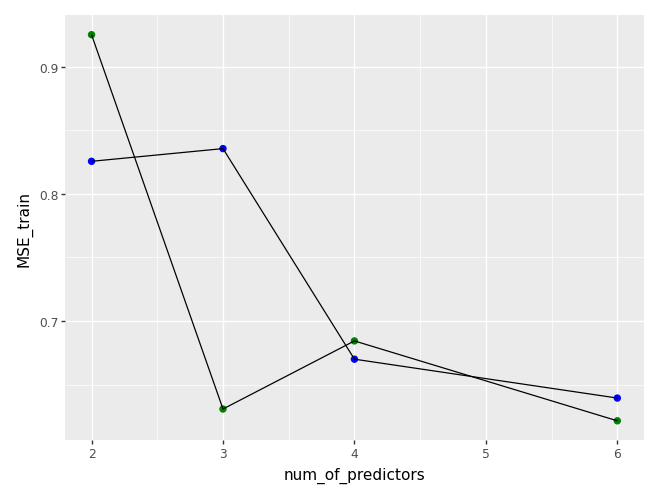

In [ ]:

(ggplot(error_df,
aes(x = 'num_of_predictors', y = 'MSE_train'))
+ geom_point(aes(x = 'num_of_predictors', y = 'MSE_train'), color = 'green', size = 2)
+ geom_point(aes(x = 'num_of_predictors', y = 'MSE_test'), color = 'blue', size = 2)
+ geom_line(aes(x = 'num_of_predictors', y = 'MSE_train'))
+ geom_line(aes(x = 'num_of_predictors', y = 'MSE_test'))



)

# Green points are training data and blue are test data

Looking at the plot (green is training, blue is test), the model that seemed to fit our data the best was the model with 6 predictors, seeing as the MSE is the lowest. If I included a model with all the predictors, we would proably see the MSE increase when number of predictors increases beyond 6 for our test data (blue points).